In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install langid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941172 sha256=a845afdafeff83762e79c7361bcccfdfc4eab7a6561ee6a376c3b0c32f1b07fe
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid


In [4]:
import json
import os
def extract_text_from_json(file_path):
    text_data = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            json_data = json.load(file)
            for tweet in json_data['tweets']:
                text_data.append(tweet['text'])
    except Exception as e:
        print("Error processing file:", file_path)
        print("Error message:", str(e))

    return text_data

def extract_text_from_directory(directory_path):
    all_text_data = []
    for root, dirs, files in os.walk(directory_path):
        for file_name in files:
            if file_name.endswith('.json'):
                file_path = os.path.join(root, file_name)
                text_data = extract_text_from_json(file_path)
                all_text_data.extend(text_data)
    return all_text_data

directory_path = '/content/drive/MyDrive/FinalWork/alljson twitter/jsonall/professional and Occupational/STEM'
all_text_data = extract_text_from_directory(directory_path)
print("Number of sentences:", len(all_text_data))

Number of sentences: 5500


In [5]:
import re
import langid

twitter_sentences = all_text_data[:]
# Define regex patterns for links and hashtags
link_pattern = r'https?://\S+'
hashtag_pattern = r'#\w+'

# Function to remove links and hashtags from text
def remove_links_and_hashtags(text):
    text = re.sub(link_pattern, '', text)
    text = re.sub(hashtag_pattern, '', text)
    return text

# Remove links and hashtags from each sentence
filtered_sentences = [remove_links_and_hashtags(sentence) for sentence in twitter_sentences]

# Remove empty sentences
filtered_sentences = [sentence for sentence in filtered_sentences if sentence.strip()]


def filter_english_sentences(sentences):
    english_sentences = []
    for sentence in sentences:
        # 使用 langid.detect 判断语言
        lang, _ = langid.classify(sentence)

        # 如果被判定为英语，则保留
        if lang == 'en':
            english_sentences.append(sentence)

    return english_sentences

english_sentences = filter_english_sentences(filtered_sentences)

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
import nltk
from nltk.corpus import stopwords

# 下载停用词
nltk.download('stopwords')

def filter_stopwords(sentences):
    stop_words = set(stopwords.words('english'))

    filtered_sentences = []
    for sentence in sentences:
        words = nltk.word_tokenize(sentence)
        filtered_words = [word for word in words if word.lower() not in stop_words]
        filtered_sentence = ' '.join(filtered_words)
        filtered_sentences.append(filtered_sentence)

    return filtered_sentences

# 从english_sentences中删除停用词
filtered_sentences = filter_stopwords(english_sentences)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
import re
def remove_emojis_from_list(text_list):
    # 使用正则表达式匹配和删除表情符号
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

    # 从每个文本片段中删除表情符号
    text_list_without_emojis = [emoji_pattern.sub(r'', text) for text in text_list]

    return text_list_without_emojis

cleaned_sentence = remove_emojis_from_list(filtered_sentences)

In [9]:
cleaned_sentence

['“ Black students earned 7 % bachelor ’ degrees 2018 , ” according 2021 research report . Abran Maldonado Norval Connell aiming change numbers ! Get inspired story via @ EdTech_K12 .',
 'room dreams made @ ToddLaVogue @ SchuemannTCS @ Mrs_Biehl',
 "'s News Friday ! chatting cool science news week : glowing frogs , ants , chromosome , ! Come join fun ! 9pm EDT twitch.tv/sciants_streams",
 'please consider supporting @ DonorsChoose project ? $ 104 needed TIA  Please RT  @ kbosanders',
 'Take little field trip participate Mobile Energy Learning Units ( MELU ) , brought Energy Day CO , 9/23 @ API_Colorado . MELU traveling exhibit six mobile units 24 individual activities teach students grades 5-8 . 10-2PM',
 "Scientists horrified find plastic rocks , dubbed `` plastiglomerates '' , remote island Brazil green turtles known lay eggs . Read .",
 'ESL students STEM Fridays many reasons . Encouraging innovation creative thinking , STEM gives opportunity collaborate practice using academic voca

## **最具代表性**

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 将cleaned_sentence转换为TF-IDF矩阵
vectorizer = TfidfVectorizer(ngram_range=(2, 5))
tfidf_matrix = vectorizer.fit_transform(cleaned_sentence)

feature_names = vectorizer.get_feature_names_out()

avg_tfidf = tfidf_matrix.mean(axis=0).A1

sorted_indices = avg_tfidf.argsort()[::-1]
top_feature_names = [feature_names[idx] for idx in sorted_indices[:20]]


In [15]:
top_feature_names

['join us',
 'high school',
 'bit ly',
 'science technology',
 'science camps kids',
 'science camps',
 'camps kids',
 'easy booking',
 'technology engineering',
 'more easy',
 'more easy booking',
 'science technology engineering',
 'next generation',
 'hands on',
 'ow ly',
 'well done',
 'podcast rdene915 topics',
 'podcast rdene915',
 'thriveinedu podcast rdene915 topics',
 'thriveinedu podcast']

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 将cleaned_sentence转换为TF-IDF矩阵，设置analyzer参数为'word'以处理句子为单位
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english', max_features=10)
tfidf_matrix = vectorizer.fit_transform(cleaned_sentence)

# 获取最具特征的句子
top_sentence_indices = tfidf_matrix.sum(axis=1).A1.argsort()[::-1][:20]
top_sentences = [cleaned_sentence[idx] for idx in top_sentence_indices]

In [17]:
top_sentences

['Attention Future Jaguars ! Learn data science machine learning . Join FREE summer camp June 26-29 ! This camp perfect students love good challenge . Register today',
 'STEM ! daughter , Jordan Sampson , Microsoft TEALS Program Computer Science teaching volunteer year Southside High School Mrs. Porsha Oliver ’ class . stopped today meet students person !',
 "looking take learning next level students ? Apply United Way 's STEM School Champions grant , powered @ arconic Foundation . 're accepting applications starting TODAY ! info , go uwswpa.org/non-profits .",
 "'s still time take advantage Keep Curiosity Alive . fun free STEM activities inspire students think act like scientists prepare new school year :",
 'huge THANK Salem Middle School welcoming us past Friday ! Fridays always FUN learning STEM ! phenomenal students , blown away knowledge . STEM Outreach Coordin…',
 'Today , broke ground new Chemours STEM Hub EastSide Charter School Wilmington , Delaware . 24,000 square foot facil

# SOM **最具普遍性**

In [38]:
def normalise(train, p):
    min_d = np.min(train)
    max_d = np.max(train)
    normalised_p = (p-min_d)/(max_d - min_d)
    return normalised_p

def denormalise(train, p):
    min_d = np.min(train)
    max_d = np.max(train)
    denormalised_p = p * (max_d - min_d) + min_d
    return denormalised_p
def find_BMU(SOM, x):
    somShape = SOM.shape
    simSOM = SOM.reshape((-1, len(x)))
    cos_sims = cosine_similarity([x], simSOM).reshape((somShape[0], somShape[1]))
    return np.unravel_index(np.argmax(cos_sims, axis=None), cos_sims.shape)


# def find_BMU(SOM,x):
#     somShape = SOM.shape
#     simSOM = SOM.reshape((-1, len(x)))
#     cos_sims = cosine_similarity([x], simSOM).reshape(somShape[:2])
#     return np.unravel_index(np.argmax(cos_sims, axis=None), cos_sims.shape)
def find_BMU_2(SOM,x):
    somShape = SOM.shape
    simSOM = SOM.reshape((-1, len(x)))
    cos_sims = cosine_similarity([x], simSOM).reshape(somShape[:2])
    return np.unravel_index(np.argpartition(cos_sims, -2, axis=None)[-2], cos_sims.shape)

# Update the weights of the SOM cells when given a single training example
# and the model parameters along with BMU coordinates as a tuple
def update_weights(SOM, train_ex, learn_rate, radius_sq,
                   BMU_coord, step=3):
    g, h = BMU_coord
    #if radius is close to zero then only BMU is changed
    if radius_sq < 1e-3:
        SOM[g,h,:] += learn_rate * (train_ex - SOM[g,h,:])
        return SOM
    # Change all cells in a small neighborhood of BMU
    for i in range(max(0, g-step), min(SOM.shape[0], g+step)):
        for j in range(max(0, h-step), min(SOM.shape[1], h+step)):
            dist_sq = np.square(i - g) + np.square(j - h)
            dist_func = np.exp(-dist_sq / 2 / radius_sq)
            SOM[i,j,:] += learn_rate * dist_func * (train_ex - SOM[i,j,:])
    return SOM

# Main routine for training an SOM. It requires an initialized SOM grid
# or a partially trained grid as parameter
def train_SOM(SOM, train_data, learn_rate = .1, radius_sq = 1,
             lr_decay = .1, radius_decay = .1, epochs = 10):
    learn_rate_0 = learn_rate
    radius_0 = radius_sq
    for epoch in np.arange(0, epochs):
        rand.shuffle(train_data)
        for train_ex in train_data:
            g, h = find_BMU(SOM, train_ex)
            SOM = update_weights(SOM, train_ex,
                                 learn_rate, radius_sq, (g,h))
        # Update learning rate and radius
        learn_rate = learn_rate_0 * np.exp(-epoch * lr_decay)
        radius_sq = radius_0 * np.exp(-epoch * radius_decay)
    return SOM

import scipy
def calculateQE(SOM,data):
    sumSqDist = 0
    for d in data:
        g,h = find_BMU(SOM, d)
        v1 = SOM[g,h]
        v2 = d
        sumSqDist += scipy.spatial.distance.cdist([v1],[v2],'sqeuclidean')[0][0]
    QE = sumSqDist/len(data)
    return QE

def calculateTE(SOM,data):
    failed = 0
    for d in data:
        g1,h1 = find_BMU(SOM,d)
        g2,h2 = find_BMU_2(SOM,d)
        dist = scipy.spatial.distance.cityblock([g1,h1], [g2,h2])
        if dist>1:
            failed+=1
    return failed/len(data)

import sklearn
#这段代码实现了计算自组织映射（SOM）训练后的网络的U-矩阵（U-matrix）。U-矩阵是一种可视化工具，用于显示SOM中各单元之间的相似度
def euclidean(a, b):
    return np.linalg.norm(a-b)

def cosine(a,b):
    return cosine_similarity([a], [b])[0][0]


def u_matrix(lattice):
    """Builds a U-matrix on top of the trained lattice.

        Parameters
        ---
        lattice : list

            The SOM generated lattice

        Returns
        ---
        The lattice of the shape (R,C):

        R - number of rows; C - number of columns;
        """
    X, Y, Z = lattice.shape
    u_values = np.empty((X,Y), dtype=np.float64)

    for y in range(Y):
        for x in range(X):
            current = lattice[x,y]
            dist = 0
            num_neigh = 0
            # left
            if x-1 >= 0:
                #middle
                vec = lattice[x-1,y]
                dist += cosine(current, vec)
                num_neigh += 1
                if y - 1 >= 0:
                    #sup
                    vec = lattice[x-1, y-1]
                    dist += cosine(current, vec)
                    num_neigh += 1
                if y + 1 < Y:
                    # down
                    vec = lattice[x-1,y+1]
                    dist += cosine(current, vec)
                    num_neigh += 1
            # middle
            if y - 1 >= 0:
                # up
                vec = lattice[x,y-1]
                dist += cosine(current, vec)
                num_neigh += 1
            # down
            if y + 1 < Y:
                vec = lattice[x,y+1]
                dist += cosine(current, vec)
                num_neigh += 1
            # right
            if x + 1 < X:
                # middle
                vec = lattice[x+1,y]
                dist += cosine(current, vec)
                num_neigh += 1
                if y - 1 >= 0:
                    #up
                    vec = lattice[x+1,y-1]
                    dist += cosine(current, vec)
                    num_neigh += 1
                if y + 1 < lattice.shape[1]:
                    # down
                    vec = lattice[x+1,y+1]
                    dist += cosine(current, vec)
                    num_neigh += 1
            u_values[x,y] = dist / num_neigh
    u_values = (u_values - 1) * -1
    return u_values

def activate(train_data, SOM, p):
    normalP = normalise(train_data, p)
    activatedSOM = np.array([[cosine_similarity([normalP], [c])[0][0] for c in r] for r in SOM])
    normalisedActivatedSOM = normalise(activatedSOM, activatedSOM)
    #activatedSOM = (normalisedActivatedSOM -1)*(-1)
    return activatedSOM


In [12]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.utils import common_texts
from gensim.utils import simple_preprocess

import nltk
from nltk.corpus import stopwords, words, names
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
cleaned_sentence

In [14]:
documents = [TaggedDocument(words=word_tokenize(s), tags=[str(i)]) for i, s in enumerate(cleaned_sentence)]

doc2vec_model = Doc2Vec(documents, vector_size=150, window=5, min_count=3, workers=4)
sentence_vectors = [doc2vec_model.infer_vector(word_tokenize(td)) for td in cleaned_sentence]

In [15]:
featureTextPairs = []
for i in range(len(sentence_vectors)):
    featureText = {}
    featureText['sentence'] = cleaned_sentence[i]
    featureText['feature'] = sentence_vectors[i]
    featureTextPairs.append(featureText)
print(len(featureTextPairs))

4842


In [25]:
featureTextPairs[9]

{'sentence': 'CSO ’ meet today first Induction ceremony @ CanyonSpringsDV proud Ss dedication STEM promotion education across campus . Welcome new returning members ! @ DVUSD @ CSOIntl',
 'feature': array([-0.02352852, -0.01850826,  0.0097401 , -0.00202675,  0.00522822,
        -0.02443049, -0.01389978,  0.07432126,  0.02050017,  0.00137787,
         0.01313053, -0.00887206,  0.00459523,  0.04299082, -0.03962002,
         0.00416144,  0.05801994, -0.01098036, -0.00965747,  0.0389286 ,
         0.00817899, -0.00464259,  0.04589583,  0.0453268 ,  0.01431252,
         0.034163  , -0.01376544, -0.00651153,  0.0035999 , -0.04679887,
        -0.00041074, -0.00162451, -0.02936656,  0.01483561, -0.0231142 ,
         0.00557082,  0.05919914, -0.02553004,  0.00143744, -0.00747693,
        -0.00411193,  0.00176282, -0.01336774, -0.02045509,  0.01211696,
        -0.00961337,  0.01931624, -0.01892646, -0.01307184,  0.04664024,
        -0.02023794,  0.01602928, -0.03711762, -0.01911784, -0.01010078,

In [32]:
from nltk.tokenize import word_tokenize
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

input_sentence = " two-book collection innovative fiction features teen girls "
input_vector = doc2vec_model.infer_vector(word_tokenize(input_sentence))

# 计算余弦相似度
similarities = cosine_similarity([input_vector], sentence_vectors)[0]

# 找到最相似的句子的索引
most_similar_index = np.argmax(similarities)
most_similar_sentence = cleaned_sentence[most_similar_index]

print("Input Sentence:", input_sentence)
print("Most Similar Sentence:", most_similar_sentence)
print("Cosine Similarity:", similarities[most_similar_index])


Input Sentence:  two-book collection innovative fiction features teen girls 
Most Similar Sentence: Empower change Giving Season & invest brighter , equitable future BIPOC girls & women . Help bridge funding gap Black-women founded/led organizations STEM , & champion diversity ! Donate limited edition SWAG . 
Cosine Similarity: 0.98918325


In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import networkx as nx
from IPython.display import Image as iImage
from IPython.display import display

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import NearestNeighbors

In [34]:
# Dimensions of the SOM grid
m = 10
n = 10
# Number of training examples
n_x = 4000
rand = np.random.RandomState(0)
# Initialize the training data
train_data = sentence_vectors

# Normalised Training Data
n_train_data = normalise(train_data, train_data)

# Initialize the SOM randomly
SOM = rand.uniform(0, 1, (m, n, len(train_data[0])))

0
1
2
3


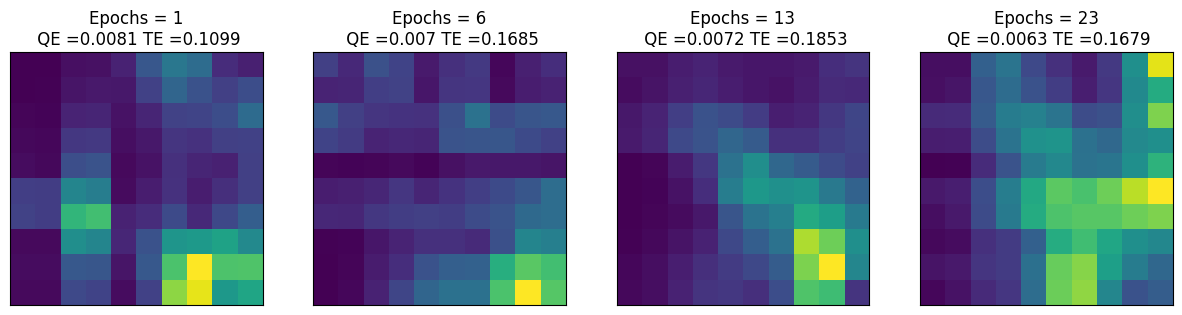

In [35]:
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(15, 3.5),
    subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 0
SOMS = []
for epochs, i in zip([1, 5, 7, 10], range(0,4)):
    print(i)
    total_epochs += epochs
    SOM = train_SOM(SOM, n_train_data, learn_rate = 0.5, radius_sq = 8, epochs = epochs)
    SOMS.append(SOM)
    QE = round(calculateQE(SOM, n_train_data), 4)
    TE = round(calculateTE(SOM, n_train_data), 4)

    ax[i].imshow(u_matrix(SOM))
    ax[i].title.set_text('Epochs = ' + str(total_epochs) + '\n QE =' + str(QE) + ' TE =' + str(TE))

In [36]:
SOMimages = []
for i in range(len(SOM)):
    row = []
    for j in range(len(SOM[0])):
        row.append([])
    SOMimages.append(row)
for f, fi in zip(n_train_data, featureTextPairs):
    g,h = find_BMU(SOM, f)
    SOMimages[g][h].append(fi)
from scipy import spatial

imageGrid = []
for g in range(len(SOMimages)):
    row = SOMimages[g]
    for h in range(len(row)):
        cell = row[h]
        if len(cell) > 0:
            imageGrid.append(cell[0]['sentence'])
        else:
            imageGrid.append('white.png')

print(len(SOMimages))
print(len(SOMimages[0]))

10
10


In [51]:
words_per_line = 4

# 调整 figsize 和 dpi 参数以获得更高分辨率的图像
fig = plt.figure(figsize=(80, 40), dpi=300)

grid = ImageGrid(fig, 111,
                 nrows_ncols=(m, n),
                 axes_pad=0.1,
                 )

for i in range(m):
    for j in range(n):
        cell = SOMimages[i][j]
        if cell:
            sentence = cell[0]['sentence']
            words = sentence.split()
            lines = [' '.join(words[k:k+words_per_line]) for k in range(0, len(words), words_per_line)]
            formatted_sentence = '\n'.join(lines)
            grid[i * n + j].set_xlim(0, 1)
            grid[i * n + j].set_ylim(0, 1)
            grid[i * n + j].text(0.5, 0.5, formatted_sentence, va='center', ha='center', fontsize=12)  # 调整 fontsize
        else:
            grid[i * n + j].text(0.5, 0.5, "", va='center', ha='center', fontsize=16)  # 调整 fontsize

# 保存图像到指定路径
output_path = "/content/drive/MyDrive/FinalWork/STM.png"
plt.savefig(output_path, bbox_inches='tight', pad_inches=0.1)
plt.show()

print(f"图像已保存到: {output_path}")

Output hidden; open in https://colab.research.google.com to view.

In [50]:
input_sentence = "enjoy long weekend new school year around corner"

# Infer the feature vector for the input sentence
input_vector = doc2vec_model.infer_vector(input_sentence.split())
normalised_input_vector = normalise(train_data, input_vector)

# Find the BMU for the input vector
bmu_index = find_BMU(SOM, normalised_input_vector)

# Retrieve the best match contents from the BMU cell
best_match_contents = []

# Check if the content at the BMU index is a list (multiple contents) or a single content
if isinstance(featureTextPairs[bmu_index[0] * SOM.shape[1] + bmu_index[1]], list):
    for content in featureTextPairs[bmu_index[0] * SOM.shape[1] + bmu_index[1]]:
        best_match_contents.append(content['sentence'])
else:
    best_match_contents.append(featureTextPairs[bmu_index[0] * SOM.shape[1] + bmu_index[1]]['sentence'])

# Print the results
print("Input sentence:", input_sentence)
print("Best match contents:", best_match_contents)


Input sentence: enjoy long weekend new school year around corner
Best match contents: ['people Victorian era would unwrapped mummies fun . Continue reading learn .']


In [43]:
SOMimages = []
for i in range(len(SOM)):
    row = []
    for j in range(len(SOM[0])):
        row.append([])
    SOMimages.append(row)

In [44]:
SOMimages

[[[], [], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], [], []]]

In [45]:
for fi in featureTextPairs:
    g,h = find_BMU(SOM, normalise(train_data, fi['feature']))
    SOMimages[g][h].append(fi)

In [46]:
[[len(c) for c in r] for r in SOMimages]

[[101, 13, 32, 37, 63, 32, 32, 45, 68, 105],
 [21, 9, 17, 43, 39, 14, 14, 18, 17, 36],
 [65, 14, 63, 101, 86, 72, 42, 34, 40, 35],
 [51, 13, 92, 110, 122, 77, 44, 22, 23, 44],
 [69, 20, 49, 89, 59, 71, 33, 34, 29, 29],
 [137, 34, 90, 119, 87, 95, 65, 31, 11, 18],
 [98, 24, 41, 41, 53, 121, 34, 8, 3, 18],
 [139, 22, 33, 19, 49, 81, 4, 7, 3, 29],
 [150, 28, 32, 22, 50, 31, 6, 4, 9, 8],
 [173, 42, 47, 114, 60, 15, 51, 32, 5, 61]]

In [47]:
def distance_between(a, b):
    a = np.asarray(a, dtype=np.float64)
    b = np.asarray(b, dtype=np.float64)
    return np.linalg.norm(a - b)

In [48]:
def find_closest_image_index(distance):
    closest_index = 0
    distance_closest = distance[0]

    for index in range(1, len(distance)):
        if distance[index] < distance_closest:
            distance_closest = distance[index]
            closest_index = index

    return closest_index

In [49]:
def get_closest_image(a,b):
  cell = SOM[a][b]
  distance = [distance_between(cell, i['feature']) for i in SOMimages[a][b]]
  closest_image_index=find_closest_image_index(distance)
  return closest_image_index